# Chapter10: Dimensionality Reduction with Principle Component Analysis

高维数据的缺点：
* 难分析
* 难解释
* 难可视化
* 难储存

但是高维数据在某些维度上是冗余的，也就是说通过其部分维上信息就足够我们准确掌握这些高维数据的信息了，那么有没有什么办法能让我们把高维数据降维至低维数据以方便我们处理，并且能够最小化信息损失呢？ 

本章主要是为了回答上述问题：通过 PCA 来对数据降维。

**本章主要内容**

* 从 Maximum Variance 角度理解 PCA
* 从 Projection 角度理解 PCA
* 从 Latent Variable 角度理解 PCA 

## 10.1 Problem Setting

PCA的主要两个目的：
1. 降维后的数据尽可能跟原数据相似（信息损失最少）
2. 在满足目的 1. 的条件下，降维越多越好

假设有 服从 i.i.d. 的数据集 $\mathcal{X} = {x_1, ..., x_N}, x_n\in \mathbb{R}^D$，mean 是 0， 协方差矩阵如下：

$$
S=\frac{1}{N} \sum_{n=1}^{N} x_{n} x_{n}^{\top}
$$

数据 $x_n$ 被压缩后在低维上的表示为 $z_n$:

$$
z_{n}=B^{\top} x_{n} \in \mathbb{R}^{M}
$$

其中 $B$ 为投影矩阵（假设 $B$ 的列是标准正交的,组成了 $M$ 维子空间的基）： 

$$B = [b_1, ..., b_M]\in \mathbb{R}^{D\times M}$$

我们的目标：找到 $\tilde x_n = BB^{\top}x\in \mathbb{R}^D$ (或者 $z_n$ 和 $B$)，使 $\tilde x_n$ 与 $x_n$ 相似 （最小化压缩损失）

借用书上的图解释下：
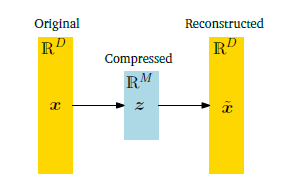

个人见解：
* 我们的主要目标是对高维原数据 $x$ 进行压缩得到低维数据 $z$，但又得保证我们对压缩的数据进行 reconstruction ($\tilde x$)时，$\tilde x$ 和 原数据 $x$ 高度相似。
* 感觉这个跟 autoencoder 思想是一样的， 所以我们可以把 $x\rightarrow z$ 看作 encode 部分； 把 $z\rightarrow \tilde x$ 当作 decode 部分。

## 10.2 Maximum Variance Perspective

数据所蕴含的信息可以看作数据分散的空间， 而我们在统计章节提到了 `variance` 是衡量数据分散程度的指标，所以为了实现数据降维中的最小化信息损失，我们可以最大化降维后数据的方差。

个人见解：

* 说个例子， 假如我们有十个学生的数学成绩和语文成绩，我们想要通过数学成绩和语文成绩的平均来排次序。这十个学生的数学成绩都是100，语文成绩却参差不齐。 为什么说数据降维时选择保留方差大的呢？ 假如我们现在不通过考虑数学成绩和语文成绩平均来排次序了， 只选择一门的成绩， 那么选哪门好呢？ 很明显应该选择语文成绩作为参考， 因为大家数学成绩都是100（方差小），根本反应不出学生成绩任何差异（信息损失偏大）。 所以当我们把数据从2维降到1维时， 应该方差比较大的语文成绩（方差大，信息损失小，在这个例子中其实是无损失的）。 

所以， 我们的目标：找到 $B$, 使降维后数据的方差最大化

注：
* 我们在上一节假设数据的 mean 是0，因为数据的 mean 不会对降维后数据的方差产生任何影响（参考下式）
    $$\mathbb{V}_z[z] = \mathbb{V}_x[B^{\top}(x-\mu)] = \mathbb{V}_x[B^{\top}x-B^{\top}\mu] = \mathbb{V}_x[B^{\top}x]$$

* 因为降维前数据的 mean 是 0， 降维后数据的 mean 也是 0：
    $$\mathbb{E}_z[z] = \mathbb{E}_x[B^{\top}x] = B^{\top}\mathbb{E}_x[x]=0$$

### 10.2.1 Direction with Maximal Variance

本子节主要讨论如果把数据降维至一维数据，那么应该怎么确定那一维的方向呢？

我们先从找到一个 single vector $b_1 \in \mathbb{R}^D$ 来最大化降维后数据的方差开始，即最大化第一坐标 $z_1$ 方向上的方差：

$$
V_{1}:=\mathrm{V}\left[z_{1}\right]=\frac{1}{N} \sum_{n=1}^{N} z_{1 n}^{2}
$$

其中 $z_1n$ 是$x_n \in \mathbb{R}^D$ 降维成 $z_n\in \mathbb{R}^M$ 后的第一坐标(其实就是投影到由 $b_1$ 确定的子空间上时的坐标)：

$$z_{1n} = b_1^{\top}x_n$$

结合上述两式可得：

$$
\begin{aligned}
V_{1} &=\frac{1}{N} \sum_{n=1}^{N}\left(b_{1}^{\top} x_{n}\right)^{2}=\frac{1}{N} \sum_{n=1}^{N} b_{1}^{\top} x_{n} x_{n}^{\top} b_{1} \\
&=b_{1}^{\top}\left(\frac{1}{N} \sum_{n=1}^{N} x_{n} x_{n}^{\top}\right) b_{1}=b_{1}^{\top} S b_{1}
\end{aligned}
$$

其中 $S$ 就是 data covariance matrix。 

注：
* 从上式可以看出 $\|b_1\|^2$ 对 $V_1$ 的影响比较大， 为了忽略 $b_1$ 的大小对 $V_1$ 的影响， 我们假设 $\|b_1\|^2 = 1$ （其实这也是我们假设 $B$ 是标准正交矩阵的原因）。
* 这样问题集中于找到数据变动最大的方向

那么我们的问题可以化为如下的优化问题：


$$
\begin{array}{l}
\max _{b_{1}} b_{1}^{\top} S b_{1} \\
\text { subject to }\left\|b_{1}\right\|^{2}=1
\end{array}
$$

Lagrangian 为：

$$
\mathfrak{L}\left(b_{1}, \lambda\right)=b_{1}^{\top} S b_{1}+\lambda_{1}\left(1-b_{1}^{\top} b_{1}\right)
$$

分别对 $b_1$, $\lambda_1$ 求导：

$$
\frac{\partial \mathfrak{L}}{\partial b_{1}}=2 b_{1}^{\top} S-2 \lambda_{1} b_{1}^{\top}, \quad \frac{\partial \mathfrak{L}}{\partial \lambda_{1}}=1-b_{1}^{\top} b_{1}
$$

分别令偏导数为0， 可得：

$$
\begin{aligned}
S b_{1} &=\lambda_{1} b_{1} \\
b_{1}^{\top} b_{1} &=1
\end{aligned}
$$

可以看出来， $b_1$ 是 data covariance matrix $S$ 的特征向量，$\lambda_1$ 是其对应的特征值。

所以$V_1$ 可以化为：

$$V_1 = b_1^{\top}Sb_1 = \lambda_1b_1^{\top}b_1=\lambda_1$$

也就是说： 降维（投影）至某一维子空间的数据的方差等于生成这个子空间的基向量 $b_1$ 所对应的特征值。

所以为了最大化降维后数据的方差， 我们可以选择 data covariance matrix 的最大特征值所对应的特征向量作为 $b_1$。 这个基向量叫做： `principal component`。

我们也可以把得到的降维数据 $z_{1n}$ 再映射回之前原数据的空间：

$$\tilde x_n = b_1z_{1n} = b_1b_1^{\top}x_n\in\mathbb{R}^D$$

注：
* 虽然 $\tilde x_n$ 是 $D$ 维数据， 但是它只需单一坐标 $z_{1n}$（基向量为 $b_1 \in \mathbb{R}^D$） 就可以表示

### 10.2.2 M-dimensional Subspace with Maximal Variance

假设我们已经找到了 $m-1$ 个 principal components， 即 $S$ 最大的 $m-1$ 个特征值所对应的 $m-1$ 个特征向量。 因为 $S$ 是对称的， 根据谱定理， 我们可以用这些特征向量作为标准正交基构建 $m-1$ 维子空间(在向量空间 $\mathbb{R}^D 内$)。

怎么找到第 $m$ 个 principle component 呢？

我们可以先从原数据中减去前 $m-1$ 个 principle component 的影响（已经被压缩的信息）， 那么会剩下一部分信息还没被压缩，我们对剩下的那部分信息找 principal component 就行了。 新的数据矩阵可以通过下式得到：

$$
\hat{X}:=X-\sum_{i=1}^{m-1} b_{i} b_{i}^{\top} X=X-B_{m-1} X
$$

其中， $X=[x_1, ..., x_N] \in \mathbb{R}^{D\times N}， B_{m-1}= \sum_{i=1}^{m-1}b_ib_i^{\top}$ （可以把数据投影至其所确定的 $m-1$ 维子空间上）

注：
* 接下来的整章， 我们把数据点 $x_1, ..., x_N$ 作为 $X$ 的列。 

我们通过最大化下式，找到 第 $m$ 个 principle component：

$$
V_{m}=\mathrm{V}\left[z_{m}\right]=\frac{1}{N} \sum_{n=1}^{N} z_{m n}^{2}=\frac{1}{N} \sum_{n=1}^{N}\left(b_{m}^{\top} \hat{x}_{n}\right)^{2}=b_{m}^{\top} \hat{S} b_{m}
$$

其中需要满足$\|b_m\|^2 = 1$ 的条件， $\hat S$ 是新数据矩阵的 covariance matrix 

按照之前的步骤， 我们可以得出： 最优的 $b_m$ 就是 $\hat S$ 的最大特征值所对应的特征向量 ($b_m$ 其实也是 $S$ 的一个特征向量)。 

因为 $S$ 和 $\hat S$ 是对称的， 我们可以找分别为 $S$ 和 $\hat S$  找到 $D$ 个不同的标准正交向量。
下面证明: $S$ 的每一个特征向量也是 $\hat S$ 的特征向量

假设我们已经找到了 $S$ 的特征向量 $b_1, ..., b_{m-1}$。 对于 $S$ 的特征向量 $b_i$  我们有： $Sb_i = \lambda_ib_i$

$$
\begin{aligned}
\hat{S} b_{i} &=\frac{1}{N} \hat{X} \hat{X}^{\top} b_{i}=\frac{1}{N}\left(X-B_{m-1} X\right)\left(X-B_{m-1} X\right)^{\top} b_{i} \\
&=\left(S-S B_{m-1}-B_{m-1} S+B_{m-1} S B_{m-1}\right) b_{i}
\end{aligned}
$$

我们分两种情况讨论：
1. 当 $i \ge m$ 时： 

    $i \ge m$ 说明 $b_i$ 是不属于 $b_1, ..., b_{m-1}$ 的， 所以 $B_{m-1}b_i = 0$
    
    $\hat Sb_i = Sb_i = \lambda_ib_i$, 即 $b_i$ 也是 $\hat S$ 的特征向量， 对应的特征值是 $\lambda_i$
    
    $\hat{S} b_{m}=S b_{m}=\lambda_{m} b_{m}$， 即 $b_m$ 既是 $S$ 的特征向量， 又是 $\hat S$ 的特征向量。 $\lambda_m$ 是 $\hat S$的最大特征值， 也是 $S$ 的第 $m$ 大特征值。 

2. 当 $i \le m$ 时：

    $i< m$ 说明 $b_i$ 是属于 $b_1, ..., b_{m-1}$ 的， 所以$b_i$ 是 $B_{m-1}$ 所能投影到的子空间的基向量。 因此， $B_{m-1}b_i = b_i$
    
    $\hat Sb_i = \left(S-S B_{m-1}-B_{m-1} S+B_{m-1} S B_{m-1}\right) b_{i} = 0 = 0b_i$， 即 $b_1, ..., b_{m-1}$ 也是 $\hat S$ 的特征向量， 对应的特征值为0


总结：

$S$ 的每一个特征向量都是 $\hat S$ 的特征向量, 如果 $S$ 的特征向量属于 $m-1$ 维主子空间（principal subspace）， 对 $\hat S$ 来说该特征向量那么对应的特征值就是 0。 

因为前面我们已经证明了 $b_m$ 也是 $S$ 的特征向量， 所以投影到第 $m$ 个 principal component 的数据的方差如下：

$$
V_{m}=b_{m}^{\top} S b_{m} {=} \lambda_{m} b_{m}^{\top} b_{m}=\lambda_{m}
$$

也就是说： 当数据投影到一个 $M$ 维子空间后， 其方差就是 data covariance matrix 的特征向量对应的特征值的和

因此，为了找到能够最小化信息损失的 $M$ 维子空间， 我们可以 PCA 找出 data covariance matrix $S$ 的 前 $M$ 个最大特征值所对应的特征向量来作为矩阵$B$的列 。 

通过前 $M$ 个 principal component 得到的方差最多是：

$$V_M = \sum_{m=1}^{M}\lambda_m$$

其中， $\lambda_m$ 是 data covariance matrix $S$ 的第 $m$ 大特征值。 

方差损失量是：


$$J_M = \sum_{j=M+1}^{D}\lambda_j = V_D - V_M$$

当然也可以用比率来体现： $1 - \frac{V_M}{V_D} $



## 10.3 Projection Perspective

前面主要讲了怎么从方差的角度来分析 PCA， 本小节主要讲如何通过最小化 `reconstruction error` 来实现 PCA。 这里的 reconstruction error 主要指 $\tilde x_n$ 和 $x_n$ 的距离



### 10.3.1 Setting and Objective

假设有一组标准正交基(orthonormal basis, ONB) $B = (b_1, ..., b_D)$， 其展开的向量空间为 $\mathbb{R}^D$。 
那么对于 $\mathbb{R}^D$ 内的任意向量 $x$, 我们可以写成基向量的线性组合：

$$
x=\sum_{d=1}^{D} \zeta_{d} b_{d}=\sum_{m=1}^{M} \zeta_{m} b_{m}+\sum_{j=M+1}^{D} \zeta_{j} b_{j}
$$

$b_d$ 前面的系数 $\zeta_d$ 就是向量在该平面内的坐标。 

我们想要找到向量 $\tilde x \in \mathbb{R}^D$, 它在一个更低维的子空间 $U\subseteq\mathbb{R}^D$ 里, dim($U$) = $M$:

$$
\tilde{x}=\sum_{m=1}^{M} z_{m} b_{m} \in U \subseteq \mathbb{R}^{D}
$$

同时要保证 $\tilde{x}$ 尽可能与 $x$ 接近。

注：
* 这里的 $z$ 是 $\tilde{x}$ 以 $b_1, ..., b_M$ 为基时的坐标， 与 $\zeta$ 不同
* $\tilde{x} \in U$ 有可能是在 $\mathbb{R}^3$ 中的一个平面上， 虽然平面的维数是2， 但平面上的向量 $\tilde{x}$ 仍有三个坐标

我们通过 $\|x-\tilde{x}\|$ 来找到最优的 $z$ 和 基向量 $b_1, ..., b_M$

如果给定数据 $\mathcal{X} = \{x_1, ..., x_N\}, x_n\in \mathbb{R}^D$， 我们把问题定义如下：

想通过找到合适的 $b_1, ..., b_M$ 和 $z_n$ 来最小化 目标函数：

$$
J_{M}:=\frac{1}{N} \sum_{n=1}^{N}\left\|x_{n}-\tilde{x}_{n}\right\|^{2}
$$

其中， $\tilde{x}$ 定义如下：
$$
\tilde{x}_{n}:=\sum_{m=1}^{M} z_{m n} b_{m}=B z_{n} \in \mathbb{R}^{D}
$$

其中， $z_n=[z_{1n}, ..., z_{Mn}]^{\top} \in \mathbb{R}^M$ 是 $\tilde{x}_n$ 以 $(b_1, ..., b_M)$ 为基时的坐标。 

接下来我按照两步来找到合适的坐标 $z_n$ 和 主子空间的标准正交基 ONB$(b_1, ..., b_M)$
* 给定 ONB $(b_1, ..., b_M)$的条件下找到最优 $z_n$
* 找到最优 ONB

### 10.3.2 Finding Optimal Coordinates

假设给定 ONB$(b_1, ..., b_M)$， 为了找到这组标准正交基下的最优坐标 $z_m$， 我们求以下偏导数：

$$
\begin{aligned}
\frac{\partial J_{M}}{\partial z_{i n}} &=\frac{\partial J_{M}}{\partial \tilde{x}_{n}} \frac{\partial \tilde{x}_{n}}{\partial z_{i n}} \\
\frac{\partial J_{M}}{\partial \tilde{x}_{n}} &=-\frac{2}{N}\left(x_{n}-\tilde{x}_{n}\right)^{\top} \in \mathbb{R}^{1 \times D} \\
\frac{\partial \tilde{x}_{n}}{\partial z_{i n}} &= \frac{\partial}{\partial z_{i n}}\left(\sum_{m=1}^{M} z_{m n} b_{m}\right)=b_{i}
\end{aligned}
$$

联立可得：

$$
\begin{aligned}
\frac{\partial J_{M}}{\partial z_{i n}} &= -\frac{2}{N}\left(x_{n}-\tilde{x}_{n}\right)^{\top} b_{i} \\
&= -\frac{2}{N}\left(x_{n}-\sum_{m=1}^{M} z_{m n} b_{m}\right)^{\top} b_{i} \\
&=-\frac{2}{N}\left(x_{n}^{\top} b_{i}-z_{i n} b_{i}^{\top} b_{i}\right)\\
&=-\frac{2}{N}\left(x_{n}^{\top} b_{i}-z_{i n}\right)
\end{aligned}
$$

令上式为0， 可解得最优坐标：

$$
z_{i n}=x_{n}^{\top} b_{i}=b_{i}^{\top} x_{n}
$$

也就是说 $\tilde{x}_n$ 的最优坐标 $z_{in}$ 是把原数据 $x_n$ 正交投影到 $b_i$ 展开的子空间时所得到的坐标。 

附上书上的两张图：

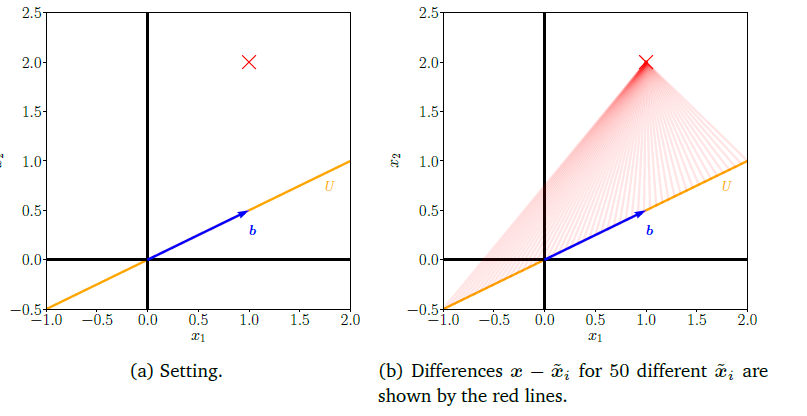

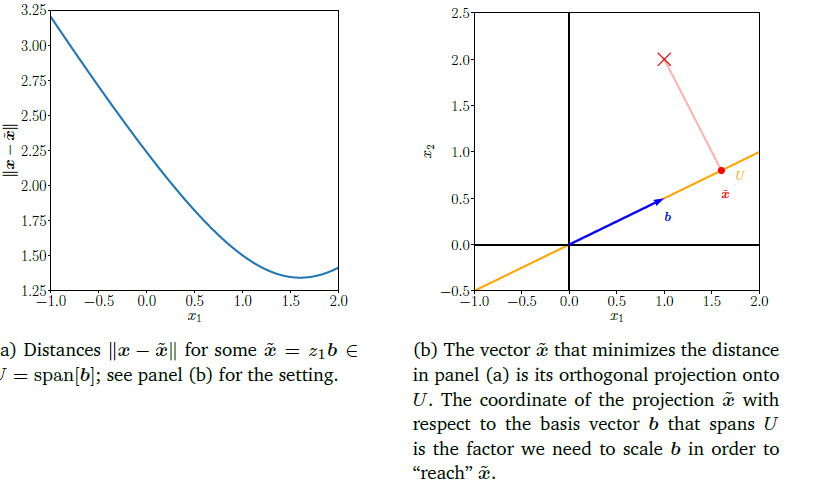

如果我们把数据投影到$\mathbb{R}^D$ 的 $M$ 维子空间上有：

$$\tilde{x} = \overbrace{ B (\underbrace{B^{\top} B}_{=I})^{-1}  B^{\top} }^\text{投影矩阵}x = BB^{\top}x$$

其中， $B=[b_1, ..., b_M]\in \mathbb{R}^{D\times M}$, 投影后的坐标为 $z = B^{\top}x$

注：

* 我们可以把 $z$ 当成投影后的向量在以 $(b_1, ..., b_M)$ 所确定的坐标系中的坐标值
* 虽然 $\tilde{x}\in \mathbb{R}^D$, 我们只需要 $M$ 个坐标值 $z_1, ..., z_M$ 来表示该向量， 其在 $(b_{M+1}, ..., b_{D})$ 上的坐标值为0



### 10.3.3 Finding the Basis of the Principal Subspace

接下来我们探讨如何确定主子空间的基 $b_1, ..., b_M$。 

根据上一子节推出的结果： $z_{i n}=x_{n}^{\top} b_{i}=b_{i}^{\top} x_{n}$

我们可以替换 $\tilde{x}_n$ 的计算方式：

$$
\tilde{x}_{n}=\sum_{m=1}^{M} z_{m n} b_{m} = \sum_{m=1}^{M}\left(x_{n}^{\top} b_{m}\right) b_{m}
$$

根据点乘的对称性， 上式可化为：

$$
\tilde{x}_{n}=\left(\sum_{m=1}^{M}b_mb^{\top}_m\right) x_{n}
$$

前面提到过， 原始数据 $x_n$ 可以写成所有基向量 $b_1, ..., b_D$ 的线性组合：

$$
\begin{aligned}
x_{n} &=\sum_{d=1}^{D} z_{d n} b_{d} = \sum_{d=1}^{D}\left(x_{n}^{\top} b_{d}\right) b_{d}=\left(\sum_{d=1}^{D} b_{d} b_{d}^{\top}\right) x_{n} \\
&=\left(\sum_{m=1}^{M} b_{m} b_{m}^{\top}\right) x_{n}+\left(\sum_{j=M+1}^{D} b_{j} b_{j}^{\top}\right) x_{n}
\end{aligned}
$$

那么其实原数据 $x$ 和投影后的数据 $\tilde{x}_n$ 的差异 $x_n - \tilde{x}_n$ 就是：

$$
\begin{aligned}
x_{n}-\tilde{x}_{n} &=\left(\sum_{j=M+1}^{D} b_{j} b_{j}^{\top}\right) x_{n} \\
&=\sum_{j=M+1}^{D}\left(x_{n}^{\top} b_{j}\right) b_{j}
\end{aligned}
$$

可以看出这个差异其实就是当把数据投影至主子空间的补空间 （由基 $b_{M+1}, ..., b_D$ 确定）时所得的结果。

所以我们的损失函数可以整理为：

$$
\begin{aligned}
J_{M} &=\frac{1}{N} \sum_{n=1}^{N}\left\|x_{n}-\tilde{x}_{n}\right\|^{2} = \frac{1}{N} \sum_{n=1}^{N}\left\|\sum_{j=M+1}^{D}\left(b_{j}^{\top} x_{n}\right) b_{j}\right\|^{2} \\
&= \frac{1}{N} \sum_{n=1}^{N}\sum_{j=M+1}^{D}(b_j^{\top}x_n)^2 = \frac{1}{N} \sum_{n=1}^{N}\sum_{j=M+1}^{D}b_j^{\top}x_nb_j^{\top}x_n = \frac{1}{N} \sum_{n=1}^{N}\sum_{j=M+1}^{D}b_j^{\top}x_n x_n^{\top}b_j \\
&= \sum_{j=M+1}^{D} b_j^{\top}\underbrace{\left( \frac{1}{N} \sum_{n=1}^{N} x_n x_n^{\top}\right)}_{= S}b_j = \sum_{j=M+1}^{D} b_j^{\top}Sb_j\\
&= \sum_{j=M+1}^{D} \mathrm{tr}(b_j^{\top}Sb_j) = \sum_{j=M+1}^{D} \mathrm{tr}(S b_j b_j^{\top}) = \mathrm{tr}\left(\underbrace{\left(\sum_{j=M+1}^{D} b_j b_j^{\top}\right)}_\text{投影矩阵}S\right)
\end{aligned}
$$

注：
* 这里运用了 tr() 的两个性质： 线性性质和 cyclic permutation

兜兜转转还是回到了最大方差角度时的结果。我们之前的结论是想要最小化损失，得最大化在主子空间上的投影的方差， 而上式告诉我们想要最小损失的话，就得最小化 covariance matrix 在主子空间的正交补空间的投影，两个结论相得益彰。

两个角度得到了相同的结论和答案， 为了最小化 reconstruction error:

$$J_M = \sum_{j=M+1}^{D}\lambda_j$$

我们需要选择 data covariance matrix 最小的 $D-M$ 个特征值， 这些特征值对应的特征向量就是主子空间对应的正交补空间的基向量。 

注：
* PCA 还可以跟 low-rank approximation 联系起来： 

    根据前面得到的结果： $\tilde{x} =  BB^{\top}x$， reconstruction error 的均方是：

    $$
    \begin{array}{l}
    \frac{1}{N} \sum_{n=1}^{N}\left\|x_{n}-\tilde{x}_{n}\right\|^{2}=\frac{1}{N} \sum_{n=1}^{N}\left\|x_{n}-B B^{\top} x_{n}\right\|^{2} \\
    =\frac{1}{N} \sum_{n=1}^{N}\left\|\left(I-B B^{\top}\right) x_{n}\right\|^{2}
    \end{array}
    $$

    为了最小化误差， 我们需要找到单位矩阵的近似矩阵 $BB^{\top}$ (秩为 $M$)
    


## 10.4 Eigenvector Computation and Low-Rank Approximation

通过前面的内容我们已经知道：主子空间（假设 $M$ 维）的基向量就是 data covariance matrix 的 $M$ 个最大特征值所对应的特征向量。 

有两种方法直接求 $S$ 的特征向量和特征值：
1. 我们可以通过 eigendecomposition 直接求出 $S$ 的特征值和特征向量
2. 因为 $S$ 是对称的， 而且 $S=\frac{1}{N}XX^{\top}$， 我们可以对 $X$ 进行奇异值分解得到 $X$ 的奇异值， 然后再求$S$ 的特征值
$$
\begin{aligned}
&\underbrace{X}_{D \times N}=\underbrace{U}_{D \times D} \space \underbrace{\Sigma}_{D \times N} \space \underbrace{V^{\top}}_{N \times N}\\
&S=\frac{1}{N} X X^{\top}=\frac{1}{N} U \boldsymbol{\Sigma} \underbrace{V^{\top} V}_{=I_{N}} \Sigma^{\top} U^{\top}=\frac{1}{N}U \Sigma \Sigma^{\top} U^{\top}\\
& \lambda_d = \frac{\sigma_d^2}{N}
\end{aligned}
$$

前面的方法都是先找到投影矩阵然后得到 $X$ 在低维子空间上的表示 $\tilde{X}$, 用 Eckart-Young 定理， 我们可以直接得到 $\tilde{X}$。 
假设我们考虑 best rank-M 近似：

$$
\tilde{X}_{M}:=\operatorname{argmin}_{\mathrm{rk}(A) \leqslant M}\|X-A\|_{2} \in \mathbb{R}^{D \times N}
$$

根据Eckart-Young 定理， 我们可以通过截取 $X$ 的 SVD的前 $M$ 个奇异值来得到 $\tilde{X}_M$:


$$
\tilde{X}_{M}=\underbrace{U_{M}}_{D \times M} \space \underbrace{\Sigma_{M}}_{M \times M} \space \underbrace{V_{M}^{\top}}_{M \times N} \in \mathbb{R}^{D \times N}
$$

其中 $\Sigma$ 是对角矩阵， 对角线上的元素是 $X$ 的 $M$ 个最大奇异值。 

## 10.5 PCA in High Dimensions

PCA 需要我们求 data covariance matrix （$D\times D$） 和 它的 特征值和特征向量。 但是当 $D$ 很大时， 计算会非常耗时。 本小节介绍一种在 $
N \ll D$ 情况下的解决上述问题的方法。 主要思想是把 $D\times D$ covariance matrix 化为 $N\times N$ covariance matrix。

前面我们有结论：

$$Sb_m = \lambda_mb_m, m=1, ..., M$$

其中， $b_m$ 是主子空间的一个基向量。 根据 $S = \frac{1}{N}XX^{\top}$, 我们把上式整理如下：

$$Sb_m =\frac{1}{N}XX^{\top}= \lambda_mb_m$$

两边同时乘上 $X^{\top} \in \mathbb{R^{N\times D}}$, 

$$
\frac{1}{N} \underbrace{X^{\top} X}_{N \times N} \underbrace{X^{\top} b_{m}}_{=: c_{m}}=\lambda_{m} X^{\top} b_{m} \Longleftrightarrow \frac{1}{N} X^{\top} X c_{m}=\lambda_{m} c_{m}
$$

也就是说 $X^{\top}X$ 和 $XX^{\top}$ 有一样的特征值， 那么我们只需求 $\frac{1}{N}X^{\top}X$ 的特征值就可以， 因为 $X^{\top}X \in \mathbb{R}^{N\times N}$, 会比之前求 $S\in\mathbb{R}^{D\times D}$ 的特征值简单很多。  

怎么得到 $S$ 的特征向量呢？只需做成 $X$ 就好：


$$
\underbrace{\frac{1}{N} X X^{\top}}_{S} X c_{m}=\lambda_{m} \underbrace{Xc_{m}}_{S 的特征向量}
$$


## 10.6 Key Steps of PCA in Practice

结合书上的图片说下 PCA 在实际应用中时的主要步骤：
1. Mean subtraction: 减去数据平均是使数据集的平均为 $0$ 
2. Standardization： 对每一维数据除以该维度上的标准差 $\sigma_d, d=1, ..., D$
3. Eigendecomposition of the covariance matrix: 计算 covariance matrix, 和它的 特征值和特征向量
4. Projection: 把数据点 $x_*\in \mathbb{R}^D$ 投影至主子空间, 投影后的数据点 $\tilde{x}_* = BB^{\top}x_*$, 坐标为 $z_* = B^{\top}x_*$(在主子空间上的坐标)

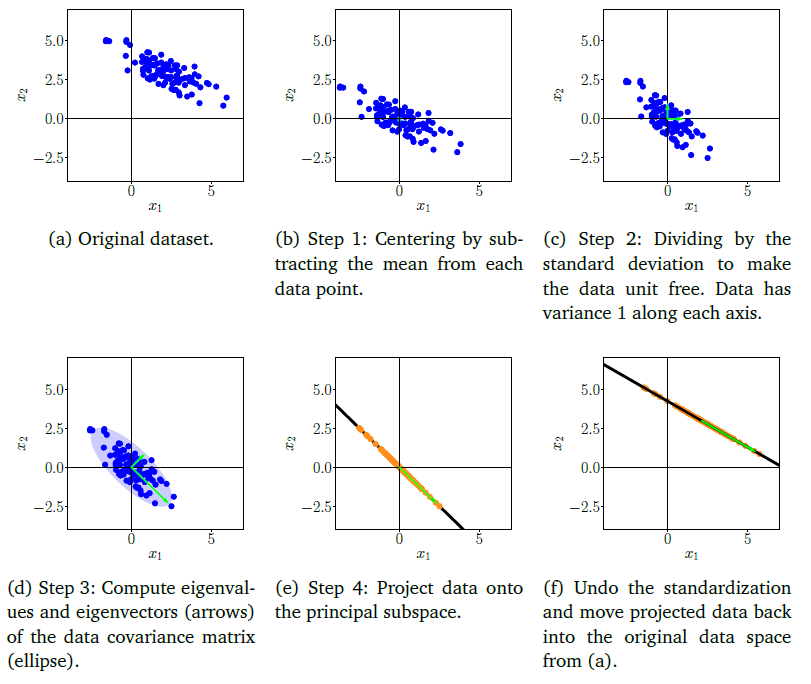

## 10.7 Latent Variable Perspective

在前面的讨论中， 我们并没有用到概率模型的概念， 只是从最大化方差和投影的角度介绍了 PCA。 本小节介绍用概率模型的方法实现 PCA。 

通过引入连续的隐藏变量 $z \in \mathbb{R}^M$, 我们可以把 PCA 定义成一个 概率隐藏变量模型 （probabilistic latent-variable model）， 这样的 PCA 被称为 `probabilistic PCA` (PPCA)。 

前面讨论的通过最大化方差和最小化 reconstruction error 的方法得到的 PCA solution, 也可以看作是 PPCA 解的一种特例（没有噪声的设定下的MLE）。 

### 10.7.1 Generative Process and Probabilistic Model

假设有连续隐藏变量 $z \in \mathbb{R}^M$，其先验概率服从高斯分布， $p(z) = \mathcal{N}(0, I)$, $z$ 和数据 $x$ 的线性关系定义如下：

$$x=Bz + \mu + \epsilon\in \mathbb{R}^D$$

其中 $\epsilon \sim \mathcal{N}(0, \sigma^2I)$ 是高斯噪声， $B\in \mathbb{R}^{D\times M}$ 和 $\mu\in \mathbb{R}^D$ 定义了从 隐藏变量到 $x$ 的线性\仿射关系。 

所以我们有：

$$
p\left(x \mid z, B, \mu, \sigma^{2}\right)=\mathcal{N}\left(x \mid B z+\mu, \sigma^{2} I\right)
$$

从上式可以得到以下 generative process:

$$
\begin{aligned}
z_{n} & \sim \mathcal{N}(z \mid \mathbf{0}, I) \\
x_{n} \mid z_{n} & \sim \mathcal{N}\left(x \mid B z_{n}+\mu, \sigma^{2} I\right)
\end{aligned}
$$

根据 `ancestral sampling scheme`: 我们先根据 $p(z)$ sample 一个 隐藏变数 $z_n$， 在根据 $\mathcal{N}\left(x \mid B z_{n}+\mu, \sigma^{2} I\right)$ sample $x_n$ 。 

所以我们的概率模型可以定义如下：

$$
p\left(x, z \mid B, \mu, \sigma^{2}\right)=p\left(x \mid z, B, \mu, \sigma^{2}\right) p(z)
$$

上述概率模型对应的 graphical model 如图所示：

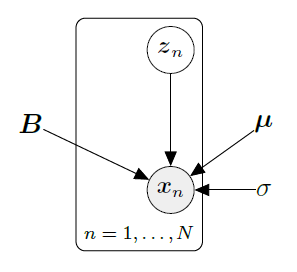

注：
* 图中箭头从 $z$ 指向 $x$, 表示 PPCA 模型假设低维隐藏变量 $z$ 是引起 $x$ 的原因。 但是我们最后是想在给定 $x$ 的情况下找到 $z$， 这就需要运用 Bayesian inference 的方法。 

### 10.7.2 Likelihood and Joint Distribution

通过对 $z$ 积分， 我们可以得到上述概率模型的似然函数：

$$
\begin{aligned}
p\left(x \mid B, \mu, \sigma^{2}\right) &=\int p\left(x \mid z, B, \mu, \sigma^{2}\right) p(z) \mathrm{d} z \\
&=\int \mathcal{N}\left(x \mid B z+\mu, \sigma^{2} I\right) \mathcal{N}(z \mid \mathbf{0}, I) \mathrm{d} z
\end{aligned}
$$

可以得出积分的结果也是服从高斯分布的 $p\left(x \mid B, \mu, \sigma^{2}\right) \sim \mathcal{N} (\mu, BB^{\top}, \sigma^2I)$

上面的似然函数可以用于 MLE 和 MAP。 

概率模型 PPCA($z$ 和 $x$ 的联合分布) 服从高斯分布：

$$
p\left(x, z \mid B, \mu, \sigma^{2}\right)=\mathcal{N}\left(\left[\begin{array}{l}
x \\
z
\end{array}\right] \mid \left[\begin{array}{l}
\mu \\
\mathbf{0}
\end{array}\right],\left[\begin{array}{cc}
B B^{\top}+\sigma^{2} I & B \\
B^{\top} & I
\end{array}\right]\right)
$$

### 10.7.3 Posterior Distribution

根据上小节的联合分布式 $p\left(x, z \mid B, \mu, \sigma^{2}\right)$, 我们可以得到后验分布 $p(z\mid x)$：

$$
\begin{aligned}
p(z \mid x) &=\mathcal{N}(z \mid m, C) \\
m &=B^{\top}\left(B B^{\top}+\sigma^{2} I\right)^{-1}(x-\mu) \\
C &=I-B^{\top}\left(B B^{\top}+\sigma^{2} I\right)^{-1} B
\end{aligned}
$$

注：
* posterior 的 covariance 与 $x$ 无关
* 给定新的 $x_*$ 我们可以得到 $z_*$ 的后验分布
* 如果 $C$ 的 determinant 很小， 说明对 $z_*$ 比较确信 

同样地， 我们可以得到 reconstructed vector $\tilde{x}_*$:

1. 先根据 $z_* \sim p(z\mid x_*)$, sample 一个 $z_*$
2. 根据 $\tilde{x}_* \sim p(x \mid z_*, B, \mu, \sigma^2)$ sample $\tilde{x}_*$